Data loading

In [44]:

import pandas as pd

path = "../data/dataset/"

files = [
    "1429_1.csv",
    "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv",
    "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
]

datasets = {}



for file in files:
    df = pd.read_csv(path + file)
    datasets[file] = df
    print(f"\n--- {file} ---")
    print("Shape:", df.shape)
    print("Columns:")
    print(df.columns.tolist())

C:\Users\User\AppData\Local\Temp\ipykernel_26520\633039275.py:16: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + file)



--- 1429_1.csv ---
Shape: (34660, 21)
Columns:
['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username']

--- Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv ---
Shape: (5000, 24)
Columns:
['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand', 'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs']

--- Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv ---
Shape: (28332, 24)
Columns:
['id', 'dateAdded', 'dateUpdated

In [45]:
df1 = datasets["1429_1.csv"]
df2 = datasets["Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"]
df3 = datasets["Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"]

print(df1.shape, df2.shape, df3.shape)


(34660, 21) (5000, 24) (28332, 24)


In [46]:
import numpy as np

final_columns = [
    "id",
    "name",
    "brand",
    "categories",
    "reviews.id",
    "reviews.date",
    "reviews.rating",
    "reviews.text",
    "reviews.title",
    "reviews.numHelpful",
    "reviews.doRecommend"
]
def standardize_columns(df, final_columns):
    
    df.columns = df.columns.str.strip()

    for col in final_columns:
        if col not in df.columns:
            df[col] = np.nan

            df=df[final_columns]
    return df

df1 = standardize_columns(df1, final_columns)
df2 = standardize_columns(df2, final_columns)
df3 = standardize_columns(df3, final_columns)

print(df1.columns)
print(df2.columns)
print(df3.columns)



Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')
Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')
Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
 

light leaning before merge


In [47]:
def light_clean(df):
    df.columns = df.columns.str.strip()

    df = df.copy()

    df["reviews.rating"] = pd.to_numeric(df["reviews.rating"], errors="coerce")
    df["reviews.text"] = df["reviews.text"].astype(str)

    df.loc[df["reviews.text"].str.lower().isin(["no reviews", "none", "nan"]), "reviews.text"] = pd.NA

    df = df.dropna(subset=["reviews.text", "reviews.rating"])

    df["reviews.text"] = df["reviews.text"].str.strip()
    df["reviews.title"] = df["reviews.title"].astype(str).str.strip()
    df.loc[df["reviews.title"].str.lower().isin(["nan", "none"]), "reviews.title"] = pd.NA

    df = df.drop_duplicates(subset=["name", "reviews.text"])

    return df

df1_cleaned = light_clean(df1)
df2_cleaned = light_clean(df2)
df3_cleaned = light_clean(df3)

print("After light clean:")
print("df1:", df1.shape)
print("df2:", df2.shape)
print("df3:", df3.shape)


After light clean:
df1: (34660, 21)
df2: (5000, 24)
df3: (28332, 24)


merge

In [48]:
df_merged = pd.concat([df1_cleaned, df2_cleaned, df3_cleaned], ignore_index=True)

print("After merging:")
print("Merged shape:", df_merged.shape)
print(df_merged["reviews.rating"].value_counts().sort_index())


After merging:
Merged shape: (66501, 27)
reviews.rating
1.0     1432
2.0     1067
3.0     2866
4.0    15185
5.0    45951
Name: count, dtype: int64


dropping suplicates

In [49]:
df_merged = df_merged.drop_duplicates(subset=["name", "reviews.text"])
print("After dropping duplicates:")
print("Merged shape:", df_merged.shape)
print(df_merged.isna().sum())


After dropping duplicates:
Merged shape: (64036, 27)
id                          0
name                     6759
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               29
reviews.dateAdded       38954
reviews.dateSeen            0
reviews.didPurchase     64026
reviews.doRecommend     11584
reviews.id              63968
reviews.numHelpful      11490
reviews.rating              0
reviews.sourceURLs          0
reviews.text                0
reviews.title              17
reviews.userCity        64036
reviews.userProvince    64036
reviews.username           11
dateAdded               34626
dateUpdated             34626
primaryCategories       34626
imageURLs               34626
manufacturerNumber      34626
sourceURLs              34626
dtype: int64


dropping useless columns

In [50]:
columns_to_drop = [
    "reviews.userCity",
    "reviews.userProvince",
    "reviews.didPurchase",
    "dateAdded",
    "dateUpdated",
    "imageURLs",
    "manufacturerNumber",
    "sourceURLs",
    "asins",
    "keys",
    "manufacturer",
    "reviews.date",
    "reviews.dateAdded",
    "reviews.dateSeen",
    "reviews.sourceURLs",
    "reviews.username"  
]

df_merged = df_merged.drop(columns=columns_to_drop, errors="ignore")
print("After dropping unnecessary columns:")
print("Merged shape:", df_merged.shape)
print("Columns in df_merged:")

for col in df_merged.columns:
    print(col)

After dropping unnecessary columns:
Merged shape: (64036, 11)
Columns in df_merged:
id
name
brand
categories
reviews.doRecommend
reviews.id
reviews.numHelpful
reviews.rating
reviews.text
reviews.title
primaryCategories


## Feature Engineering: Unified Category Column

We combine `primaryCategories` and `categories` into a single 
`combined_categories` column to preserve both high-level and detailed 
category information for later clustering.


In [51]:
df_merged["combined_categories"] = (
    df_merged["primaryCategories"].fillna("") + " " +
    df_merged["categories"].fillna("")
).str.strip()

print("Added combined_categories column")
print(df_merged[["primaryCategories", "categories", "combined_categories"]].head())

Added combined_categories column
  primaryCategories                                         categories  \
0               NaN  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1               NaN  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2               NaN  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3               NaN  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4               NaN  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                 combined_categories  
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...  
1  Electronics,iPad & Tablets,All Tablets,Fire Ta...  
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...  
3  Electronics,iPad & Tablets,All Tablets,Fire Ta...  
4  Electronics,iPad & Tablets,All Tablets,Fire Ta...  


## Create Sentiment Labels from Review Ratings

In this step, we convert numerical review ratings into categorical sentiment labels:

- 1–2 → Negative  
- 3 → Neutral  
- 4–5 → Positive  

This will be used as the target variable for the sentiment classification model.


In [52]:
def rating_to_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df_merged["sentiment"] = df_merged["reviews.rating"].apply(rating_to_sentiment)

print(df_merged["sentiment"].value_counts())


sentiment
positive    58864
neutral      2747
negative     2425
Name: count, dtype: int64


## Train/Test Split Stratified

We split the dataset into a basic 80-20 split training and testing sets using stratification 
to preserve the original sentiment distribution across both sets.


In [55]:
from sklearn.model_selection import train_test_split

x = df_merged["reviews.text"]
y = df_merged["sentiment"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Training size:", x_train.shape)
print("Testing size:", x_test.shape)

print("\nTrain distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))

Training size: (51228,)
Testing size: (12808,)

Train distribution:
sentiment
positive    0.919224
neutral     0.042906
negative    0.037870
Name: proportion, dtype: float64

Test distribution:
sentiment
positive    0.919269
neutral     0.042864
negative    0.037867
Name: proportion, dtype: float64


## Text Vectorization TF-IDF

We convert review text into numerical features using TF-IDF so a machine learning model
can learn patterns from the text.


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    ngram_range=(1, 2),
    min_df=2,
    max_features=100_000
)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

print("x_train_tfidf shape:", x_train_tfidf.shape)
print("x_test_tfidf shape:", x_test_tfidf.shape)

x_train_tfidf shape: (51228, 92220)
x_test_tfidf shape: (12808, 92220)


## Sentiment Classifier Logistic Regression with Class Weights

We train a Logistic Regression classifier on TF-IDF features.
Class weights help the model pay more attention to minority classes (neutral/negative).


Classification report:

              precision    recall  f1-score   support

    negative       0.52      0.79      0.63       485
     neutral       0.37      0.59      0.46       549
    positive       0.98      0.93      0.96     11774

    accuracy                           0.91     12808
   macro avg       0.63      0.77      0.68     12808
weighted avg       0.94      0.91      0.92     12808



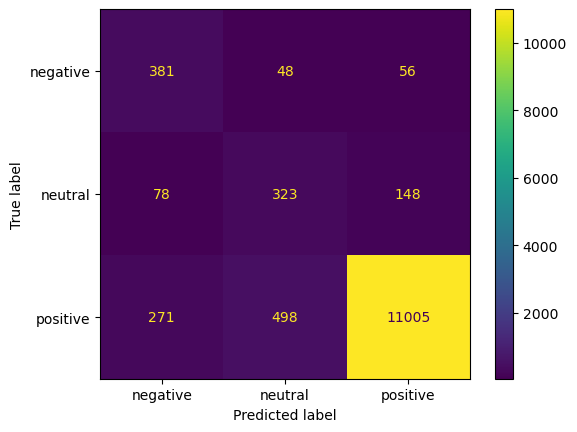

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

logreg = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    n_jobs=-1
)

logreg.fit(x_train_tfidf, y_train)

# Predict on test set
y_pred = logreg.predict(x_test_tfidf)

# Evaluation
print("Classification report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=["negative", "neutral", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot(values_format="d")
plt.show()

## Model Improvement: TF-IDF + Linear SVM Class-Weighted

We try a Linear Support Vector Machine classifier on TF-IDF features.
This model often improves performance on text classification, especially for minority classes.


Classification report (LinearSVC):

              precision    recall  f1-score   support

    negative       0.74      0.71      0.73       485
     neutral       0.66      0.48      0.56       549
    positive       0.97      0.99      0.98     11774

    accuracy                           0.95     12808
   macro avg       0.79      0.72      0.75     12808
weighted avg       0.95      0.95      0.95     12808



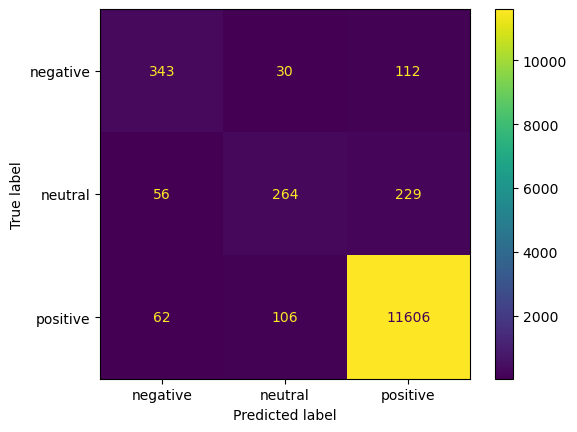

In [61]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Linear SVM with class weights
svm = LinearSVC(class_weight="balanced", random_state=42)
svm.fit(x_train_tfidf, y_train)

# Predict
y_pred_svm = svm.predict(x_test_tfidf)

# Evaluate
print("Classification report (LinearSVC):\n")
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm, labels=["negative", "neutral", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot(values_format="d")
plt.show()
